Notebook original written by Tobin Wainer

Modified by Charlie Willard to output the Periodograms

CW also included some visualization cells.


In [61]:
import astropy.units as u
import numpy as np
from astroquery.simbad import Simbad
import astropy.coordinates as coord

from astropy.io import ascii
from astropy.io import fits
import os.path

import elk
from elk.ensemble import EnsembleLC
from elk.lightcurve import BasicLightcurve

from astropy.table import Table, join, MaskedColumn, vstack, Column
from matplotlib import pyplot as plt

In [2]:
pwd

'/Users/howard_willard/Desktop/TESS_Cluster_Age_ML-main'

In [83]:
path = '/Users/howard_willard/Desktop/TESS_Cluster_Age_ML-main'

In [7]:
#os.walk(os.path.expanduser(path+gal+"/"))

In [8]:
 #    [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(path+gal+"/")) for f in fn]
 # for dp, dn, fn in os.walk(os.path.expanduser(path+gal+"/")) for f in fn]


# Set Options

In [65]:
use_full_sectors = False
use_half_sectors = True
use_12day_rolling_window = False
use_stiched_sectors = False


# Load the Lightcure Data

In [62]:
path='/Users/howard_willard/Desktop/TESS_Cluster_Age_ML-main/light_curves/'

gal_list=['MW', 'LMC', 'SMC']

l_of_cs=[]


for gal in gal_list:
    
    # # Build the full base directory path, expanding the user (~)
    # base_path = os.path.expanduser(path + "/")
    
    # # Initialize an empty list to hold full file paths
    # filenames = []

    # # Walk through all directories and subdirectories starting at base_path
    # for dirpath, dirnames, files in os.walk(base_path):
    #     # For each file in the current directory
    #     for filename in files:
    #         # Join directory path and filename to get the full file path
    #         full_path = os.path.join(dirpath, filename)
    #         # Add the full path to the list
    #         filenames.append(full_path)

    # print(filenames)
    filenames =  [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(path+gal+"/")) for f in fn]

    for file in filenames:
        l_of_cs.append(elk.ensemble.from_fits(file))

In [63]:
l_of__all_lcs=[]
for i in range(len(l_of_cs)):
    for j in range(len(l_of_cs[i].lcs)):
        l_of__all_lcs.append(l_of_cs[i].lcs[j].corrected_lc)

In [64]:
len(l_of__all_lcs)

2204

In [51]:
#l_of__all_lcs

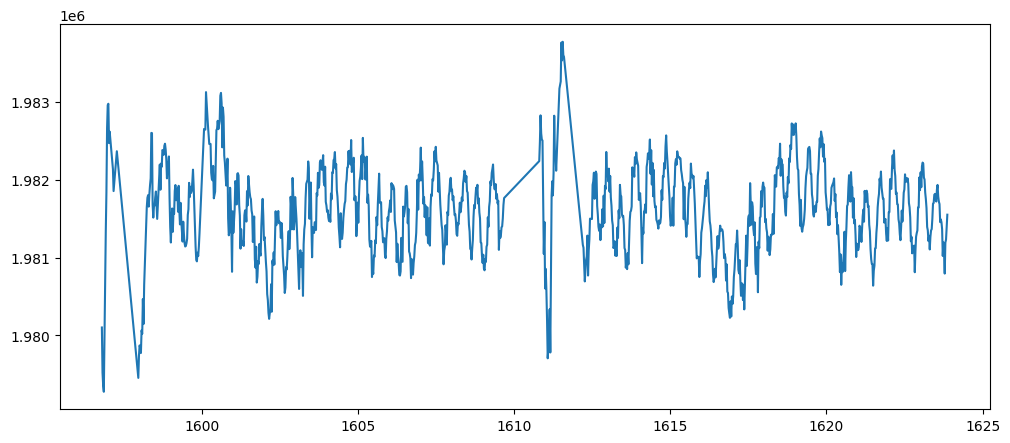

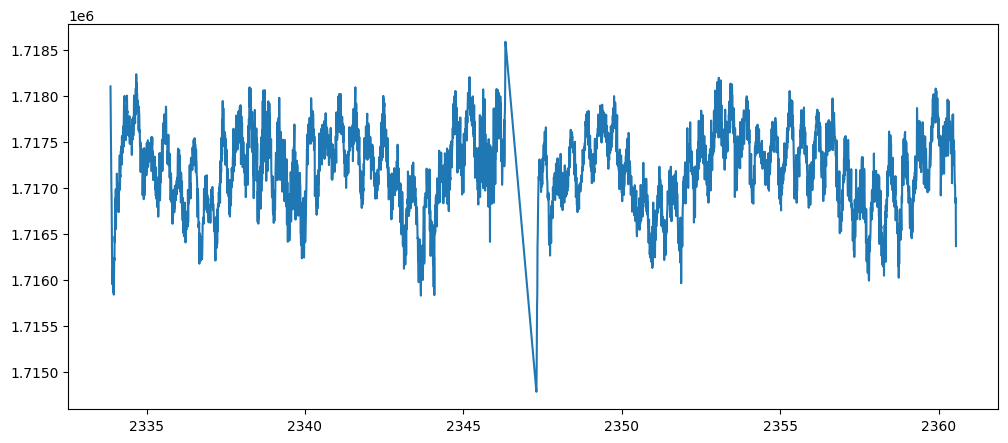

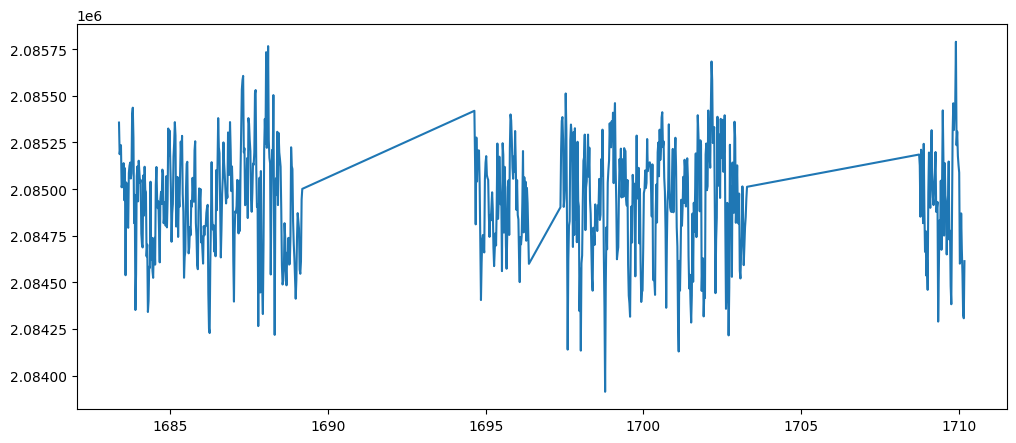

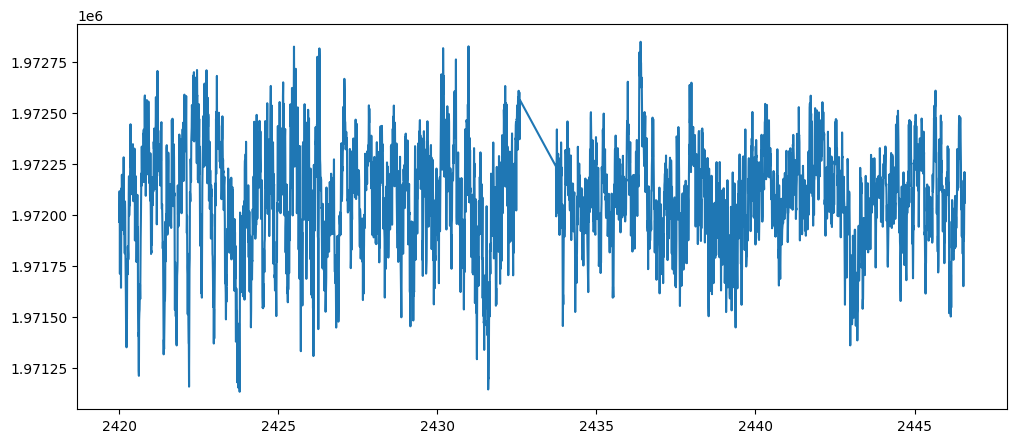

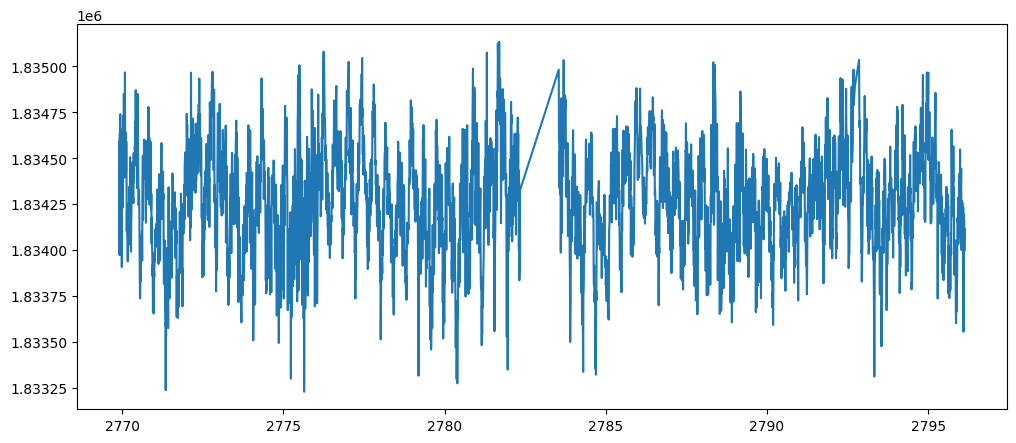

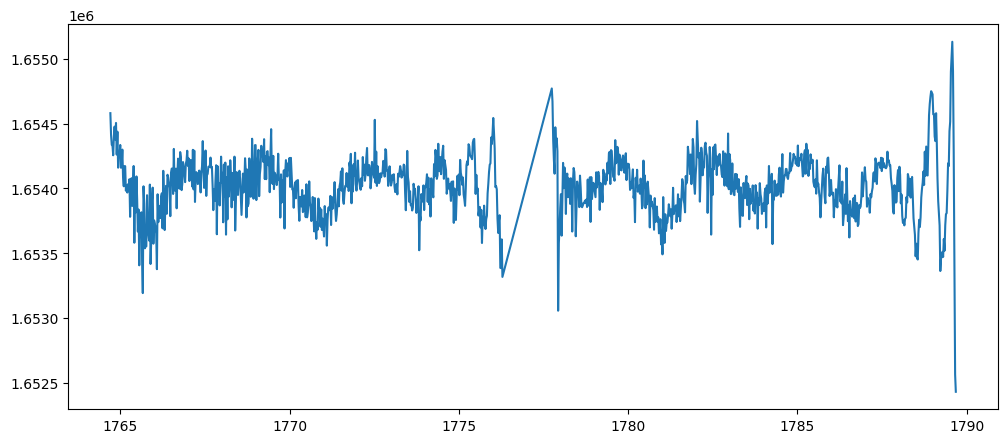

In [5]:
for i in range(0, 6):
    plt.figure(figsize=(12,5))
    #plt.scatter(l_of__all_lcs[i]['time'].value, l_of__all_lcs[i]['flux'].value, s=1)
    plt.plot(l_of__all_lcs[i]['time'].value, l_of__all_lcs[i]['flux'].value)

# Bin into 12 Day Windows

In [67]:
data_augmented_lcs=[]

for i in range(len(l_of__all_lcs)):

    if use_full_sectors:
        data_augmented_lcs.append(l_of__all_lcs[i])

    if use_half_sectors:
        #Split each light curve (ie sector) in half, therefore taking ~12 day windows in the lc:
        data_augmented_lcs.append(l_of__all_lcs[i][:int(len(l_of__all_lcs[i])/2)])
        data_augmented_lcs.append(l_of__all_lcs[i][int(len(l_of__all_lcs[i])/2):])
    
    #if use_stiched_sectors:
        # stich together lightcurves.
        # if names are the same, vstack
        # make sure time order is preserved.
        
    #if use_12day_rolling_window:


In [7]:
len(data_augmented_lcs)

2204

1794
617
1847
642
1840
1724


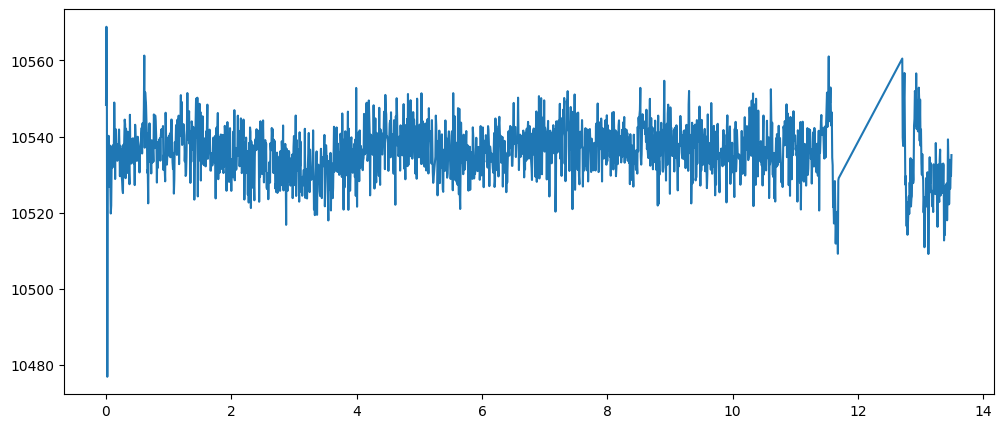

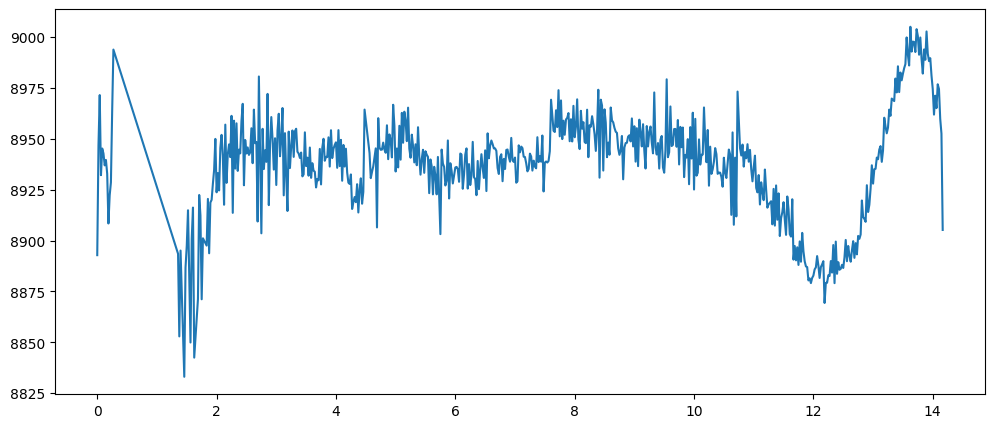

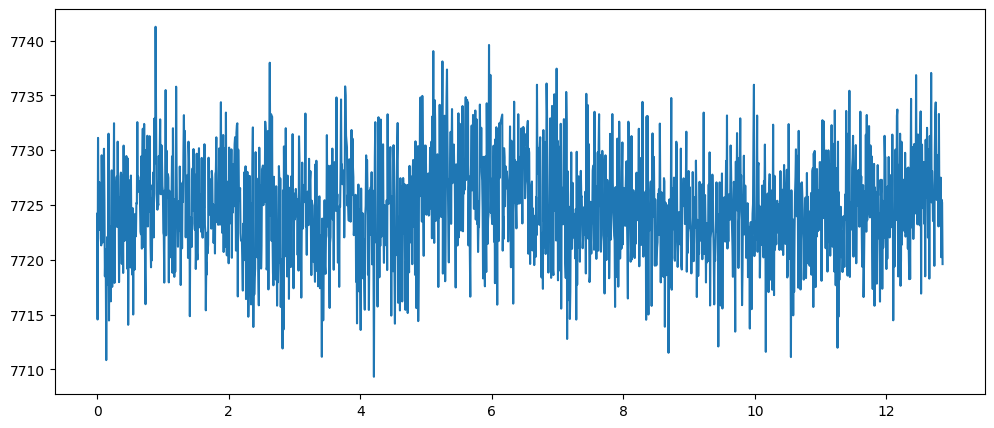

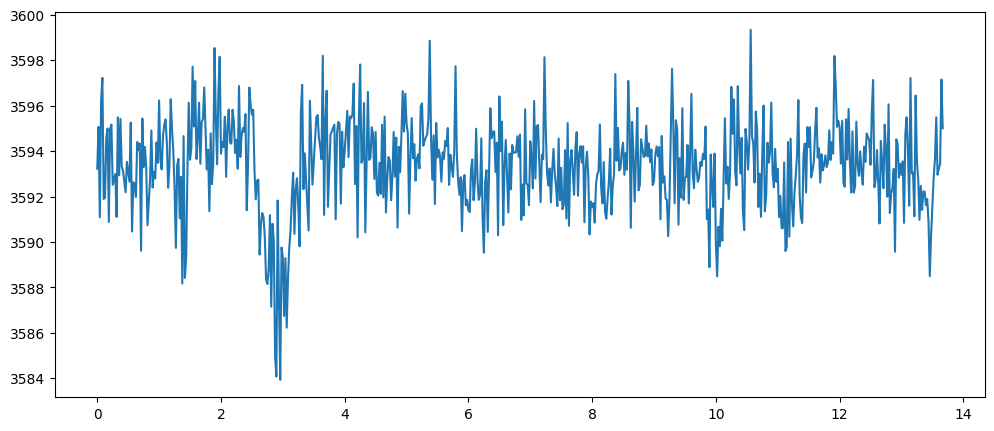

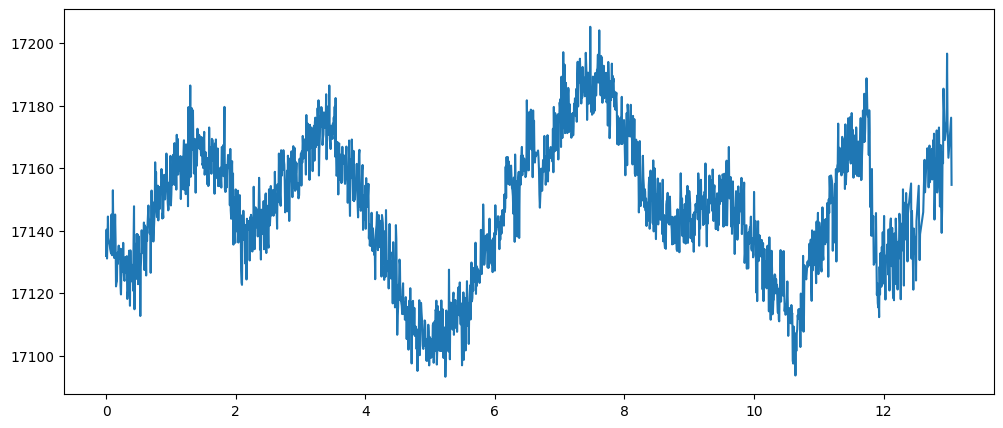

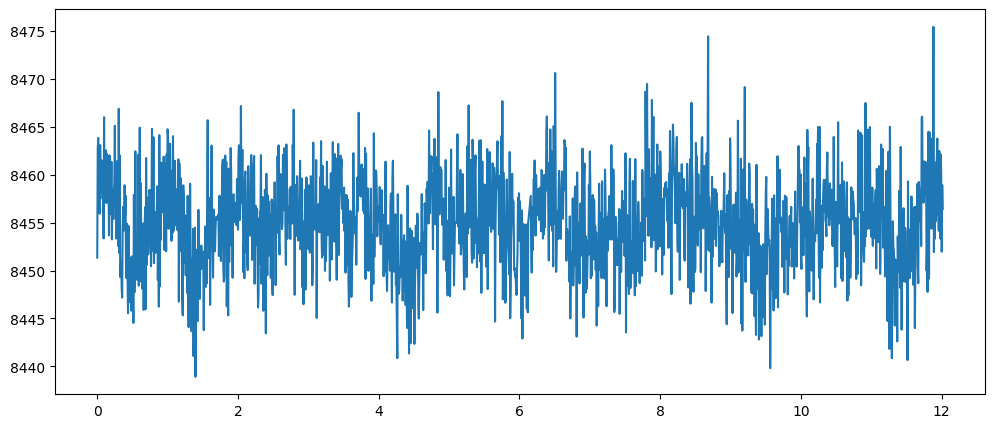

In [68]:
import random

for _ in range(6):
    i = random.randint(0, len(data_augmented_lcs) - 1)
    print(len(data_augmented_lcs[i]['time']))
    plt.figure(figsize=(12,5))
    #plt.scatter(l_of__all_lcs[i]['time'].value, l_of__all_lcs[i]['flux'].value, s=1)
    t = data_augmented_lcs[i]['time'].value
    f = data_augmented_lcs[i]['flux'].value
    plt.plot(t-t[0], f)

# Add Names

In [70]:
names=[]

for i in range(len(l_of_cs)):
    j=0
    while j < (len(l_of_cs[i].lcs)):

        if use_full_sectors:
            names.append(l_of_cs[i].callable)
        
        if use_half_sectors:
            names.append(l_of_cs[i].callable) 
            names.append(l_of_cs[i].callable)
        
        j+=1
        
len(names)

4408

In [71]:
names

['NGC 5381',
 'NGC 5381',
 'NGC 5381',
 'NGC 5381',
 'RUPRECHT 172',
 'RUPRECHT 172',
 'RUPRECHT 172',
 'RUPRECHT 172',
 'RUPRECHT 172',
 'RUPRECHT 172',
 'KING 1',
 'KING 1',
 'KING 1',
 'KING 1',
 'KING 1',
 'KING 1',
 'KING 1',
 'KING 1',
 'LYNGA 5',
 'LYNGA 5',
 'LYNGA 5',
 'LYNGA 5',
 'FSR 1769',
 'FSR 1769',
 'FSR 1769',
 'FSR 1769',
 'NGC 6569',
 'NGC 6569',
 'NGC 6134',
 'NGC 6134',
 'ASCC 8',
 'ASCC 8',
 'ASCC 8',
 'ASCC 8',
 'NGC 5299',
 'NGC 5299',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'VDBERGH-HAGEN 67',
 'CZERNIK 13',
 'CZERNIK 13',
 'CZERNIK 13',
 'CZERNIK 13',
 'CZERNIK 13',
 'CZERNIK 13',
 'FSR 0167',
 'FSR 0167',
 'FSR 0167',
 'FSR 0167',
 'FSR 0167',
 'FSR 0167',
 'FSR 0167',
 'FSR 0167',
 'NGC 2910',
 'NGC 2910',
 'NGC 2910',
 'NGC 2910',
 'NGC 2910',
 'NGC 2910',
 'NGC 2910',
 'NGC 2910',
 'ASCC 116',
 'ASCC 116',
 '

# Get Summary Statistics

In [72]:
import numpy as np

from astroML.datasets import fetch_sdss_galaxy_images, fetch_LINEAR_sample, fetch_LINEAR_geneva
from astroML.utils import split_samples

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.gaussian_process import GaussianProcessRegressor

from tqdm import tqdm
from scipy.special import entr

In [25]:
# %%time
# l_of_stat_tables=[]

# for i in range(len(data_augmented_lcs)):
    
#     lc=BasicLightcurve(data_augmented_lcs[i]['time'], data_augmented_lcs[i]['flux'], 
#                     data_augmented_lcs[i]['flux_err'], sector=99)
    
#     lc.get_stats_using_defaults()

#     table=lc.get_stats_table(names[i])['name',
#      'rms',
#      'std',
#      'MAD',
#      'sigmaG',
#      'skewness',
#      'von_neumann_ratio',
#      'J_Stetson',
#      'max_power',
#      'freq_at_max_power',
#      'n_peaks',
#      'ratio_of_power_at_high_v_low_freq',
#      'FAP',
#      'max_autocorrelation',
#      'time_of_max_autocorrelation']
    

#     # (1/np.arange(0.04, 11, 0.01) --> spacing of frequency bins
#     # here 0.04 --> 11 in days
#     # 1/time = frequency
#     # 0.01 spacing is fine for single
#     # sampling should be proportional to # days in lightcurve
#     # 0.0001 = 6 sectors
#     # 0.00001 is the max probs?

#     periodogram = lc.periodogram
#     frequency_list = 1/np.arange(0.04, 11, 0.01)
    
#     sum_LSP_power_10_7_days = np.sum(periodogram[np.where((frequency_list < 10) & (frequency_list > 7))])
#     sum_LSP_power_7_4_days  = np.sum(periodogram[np.where((frequency_list < 7)  & (frequency_list > 4))])
#     sum_LSP_power_4_1_days  = np.sum(periodogram[np.where((frequency_list < 4)  & (frequency_list > 1))])            
#     sum_LSP_power_1_p5_days = np.sum(periodogram[np.where((frequency_list < 1)  & (frequency_list > .5))])        

#     # sum_LSP_power_10_7_days = np.sum(lc.periodogram[np.where((1/np.arange(0.04, 11, 0.01) < 10) &
#     #                                                                                      (1/np.arange(0.04, 11, 0.01) > 7))])
#     # sum_LSP_power_7_4_days = np.sum(lc.periodogram[np.where((1/np.arange(0.04, 11, 0.01) < 7) &
#     #                                                                                      (1/np.arange(0.04, 11, 0.01) > 4))])
#     # sum_LSP_power_4_1_days = np.sum(lc.periodogram[np.where((1/np.arange(0.04, 11, 0.01) < 4) &
#     #                                                                                      (1/np.arange(0.04, 11, 0.01) > 1))])            
#     # sum_LSP_power_1_p5_days = np.sum(lc.periodogram[np.where((1/np.arange(0.04, 11, 0.01) < 1) &
#     #                                                                                      (1/np.arange(0.04, 11, 0.01) > .5))])        

#     entropy = entr(data_augmented_lcs[i]['flux'].value).sum()
    
#     table.add_column(Column(sum_LSP_power_10_7_days), name='SumLSP_10_7_Day_Power')
#     table.add_column(Column(sum_LSP_power_7_4_days), name='SumLSP_7_4_Day_Power')
#     table.add_column(Column(sum_LSP_power_4_1_days), name='SumLSP_4_1_Day_Power')
#     table.add_column(Column(sum_LSP_power_1_p5_days), name='SumLSP_1_p5_Day_Power')
#     table.add_column(Column(entropy), name='Entropy')
    
#     l_of_stat_tables.append(table)

CPU times: user 1h 33min 17s, sys: 1min 46s, total: 1h 35min 3s
Wall time: 57min 54s


In [76]:
from astropy.table import Column
from scipy.stats import entropy as entr
import time

In [77]:
%%time

l_of_stat_tables = []

import sys

# Start timer before the loop
start_time = time.time()

def print_progress_bar(i, total, length=30, start_time=None):
    percent = i / total
    filled = int(length * percent)
    bar = '█' * filled + '-' * (length - filled)

    elapsed = time.time() - start_time
    if i > 0:
        eta = (elapsed / i) * (total - i)
        eta_str = time.strftime("%H:%M:%S", time.gmtime(eta))
    else:
        eta_str = "--:--:--"

    sys.stdout.write(f'\rProgress: |{bar}| {round(percent * 100, 1)}% | ETA: {eta_str}')
    sys.stdout.flush()

for i in range(len(data_augmented_lcs)):
    print_progress_bar(i + 1, len(data_augmented_lcs), start_time=start_time)

    lc = BasicLightcurve(data_augmented_lcs[i]['time'],
                         data_augmented_lcs[i]['flux'],
                         data_augmented_lcs[i]['flux_err'],
                         sector=99)

    lc.get_stats_using_defaults()

    table = lc.get_stats_table(names[i])[[
        'name',
        'rms',
        'std',
        'MAD',
        'sigmaG',
        'skewness',
        'von_neumann_ratio',
        'J_Stetson',
        'max_power',
        'freq_at_max_power',
        'n_peaks',
        'ratio_of_power_at_high_v_low_freq',
        'FAP',
        'max_autocorrelation',
        'time_of_max_autocorrelation'
    ]]

    # Periodogram and frequency grid
    frequency_list = 1 / np.arange(0.04, 11, 0.01)
    periodogram = lc.periodogram

    # Because the lightcurves were smoothed over timescales >10days, don't use those scales.
    periodogram = periodogram[(frequency_list < 10)]
    frequency_list = frequency_list[(frequency_list < 10)]
    
    # Sum power in specific period bands
    sum_LSP_power_10_7_days = np.sum(periodogram[(frequency_list < 10) & (frequency_list > 7)])
    sum_LSP_power_7_4_days  = np.sum(periodogram[(frequency_list < 7) & (frequency_list > 4)])
    sum_LSP_power_4_1_days  = np.sum(periodogram[(frequency_list < 4) & (frequency_list > 1)])
    sum_LSP_power_1_p5_days = np.sum(periodogram[(frequency_list < 1) & (frequency_list > 0.5)])

    # Shannon entropy of the flux
    entropy_val = entr(data_augmented_lcs[i]['flux'].value).sum()

    # Add new features
    table.add_column(Column(sum_LSP_power_10_7_days), name='SumLSP_10_7_Day_Power')
    table.add_column(Column(sum_LSP_power_7_4_days), name='SumLSP_7_4_Day_Power')
    table.add_column(Column(sum_LSP_power_4_1_days), name='SumLSP_4_1_Day_Power')
    table.add_column(Column(sum_LSP_power_1_p5_days), name='SumLSP_1_p5_Day_Power')
    table.add_column(Column(entropy_val), name='Entropy')

    # NEW: add full periodogram as a variable-length array column
    table.add_column(Column([periodogram], name='FullPeriodogram'))

    l_of_stat_tables.append(table)


Progress: |██████████████████████████████| 100.0% | ETA: 00:00:00CPU times: user 24min 46s, sys: 27.3 s, total: 25min 13s
Wall time: 25min 50s


In [78]:
stat_table=vstack(l_of_stat_tables)


In [79]:
stat_table

<Table length=4408>
      name              rms                  std           ... SumLSP_1_p5_Day_Power      Entropy                       FullPeriodogram                 
     str17            float64              float64         ...        float64             float64                        float64[1089]                  
--------------- ------------------- ---------------------- ... --------------------- ------------------ ------------------------------------------------
       NGC 5381 0.12860581353174044  0.0002975862445908725 ...    0.6386231874522682  6.349138947096929   0.011392788345445541 .. 0.00016864060377760296
       NGC 5381 0.20227397545191975 0.00027494974730113116 ...    0.4476281110660695  6.350885678917074    0.040493728927247286 .. 0.0003531227452214391
       NGC 5381 0.16376175676775878  0.0002534884014241052 ...   0.48191903514191253  7.520776382932313   0.018792080664426426 .. 2.2393253925536184e-05
       NGC 5381 0.19277891231682573  0.0002376975364376943 ...   0.20630188336220012  7.521317951947694      0.10648403177704077 .. 0.000307586897251254
   RUPRECHT 172  0.1267374136537379 0.00012791040198304837 ...    1.0706258889861693  5.880532978220142    0.0027777337472355834 .. 0.005993490285279542
   RUPRECHT 172  0.1834981906746259 0.00014761891850639786 ...     0.851706412857824  5.883322377592194 0.00027149188607177764 .. 0.00018512748884342482
            ...                 ...                    ... ...                   ...                ...                                              ...
[PIR2016] VMC23 0.10274739535368617  0.0010714893814724516 ...    0.5267130808669906 7.4241647070038415   0.007455648133548869 .. 0.00036520017024849855
[PIR2016] VMC23 0.05366562774552556  0.0007520807848296379 ...    0.3029669565765742  7.452402168409284     0.03162476508804049 .. 0.0008479151139785381
[PIR2016] VMC23 0.07243086813966702  0.0009135607463656249 ...   0.39224118143874154   7.45298191214807    0.005197514111485705 .. 0.0005877254025759158
       [H86] 87 0.14723008459578915  0.0006774528847745679 ...     1.794484444438542  7.423568214804137  0.0033508395853645827 .. 0.00043955392876089954
       [H86] 87 0.14238615285444692  0.0006926534194117821 ...    1.7445768768500551  7.424165041176633    0.0004231385317457661 .. 0.000391933518113435
       [H86] 87 0.15943296867596535  0.0006997476525092863 ...    1.7677948686404483  7.452402206409064   0.0015164874010958876 .. 0.0001831867916827675
       [H86] 87 0.16386588572283137  0.0007444282651898949 ...    1.8264308057446736  7.452982052401445  0.0011901887188791329 .. 0.00029440977491813604

# Add Age Column

In [82]:
path

'/Users/howard_willard/Desktop/TESS_Cluster_Age_ML-main/light_curves/'

In [85]:
#get_ages
path = '/Users/howard_willard/Desktop/TESS_Cluster_Age_ML-main'
mw=Table.read(path+'/data/Use_MW.fits')
mw

smc=Table.read(path+'/data/Bica_Cut_down.fits')
smc

lmc=Table.read(path+'/data/Glatt_Cut_down.fits')
lmc

<Table length=118>
  Name         DEC                 RA        n_Name  E_B-V_       RADIUS       ...   Age2    Vmag   e_Vmag SimbadName               Cross-ID              recno
                                                      mag         arcmin       ...   [yr]    mag     mag                                                       
 bytes7      float64            float64      bytes1 float64      float64       ... float64 float64 float64  bytes17                 bytes46               int32
------- ------------------ ----------------- ------ ------- ------------------ ... ------- ------- ------- ---------- ----------------------------------- -----
LMC0022           -68.6725 69.59166666666665           0.08               45.0 ...     0.0   13.11    0.14    NGC1652 NGC1652,SL10,LW14, ESO55SC32,KMHK23     3
LMC0076 -72.39472222222223 71.69166666666666           0.05               60.0 ...     0.0   13.51    0.12  [SL63] 37                    SL37,LW61,KMHK98    26
LMC0086 -69.37388888888889 71.93333333333332           0.15               40.2 ...     0.0   12.26    0.12    NGC1695     NGC1695,SL40,ESO56SC03, KMHK101    32
LMC0098 -69.11472222222221 72.26666666666665            0.1 43.199999999999996 ...     0.0   11.41    0.12    NGC1698      NGC1698,SL45,ESO56SC06,KMHK115    37
LMC0111 -69.75527777777778 72.47916666666666           0.05 49.199999999999996 ...     0.0   11.41    0.09    NGC1704     NGC1704,SL50,ESO56SC09, KMHK130    44
LMC0120            -69.985 72.65416666666665           0.18              102.0 ...     0.0   9.469    0.11    NGC1711      NGC1711,SL55,ESO56SC10,KMHK145    51
    ...                ...               ...    ...     ...                ... ...     ...     ...     ...        ...                                 ...   ...
LMC3271 -70.57444444444444 77.07499999999999            0.1               48.0 ...     0.0   13.54    0.13    KMHK581                             KMHK581  1036
LMC3397 -71.87444444444444 79.89166666666665            0.1 43.199999999999996 ...     0.0   13.67     0.1 [SL63] 394                       SL394,KMHK789  1052
LMC3519 -66.41638888888889 82.70416666666667           0.05               48.0 ...     0.0   12.34    0.11 [SL63] 527                       SL527,KMHK995  1083
LMC3659 -68.92083333333333 85.45416666666667      *     0.1               42.0 ...     0.0   11.96    0.13    NGC2093    NGC2093,SL657,ESO56SC23,KMHK1245  1119
LMC3727           -67.0625 86.97499999999998           0.15 49.199999999999996 ...     0.0   11.76     0.1   KMHK1378                            KMHK1378  1134
LMC3986 -67.49888888888889 81.56249999999999      *    0.05               45.0 ...     0.0   12.18    0.12   BSDL1674                            BSDL1674  1185

In [86]:
ages=[]
for name in list(stat_table['name']):
    for i in range(len(mw)):
        if mw[i]['NAME']== name:
            ages.append(mw[i]['LOG_AGE'])
    
    for j in range(len(smc)):
        if smc[j]['SimbadName']==name:
            ages.append(smc[j]['logAge'])
            
    for k in range(len(lmc)):
        if lmc[k]['SimbadName']==name:
            ages.append(lmc[k]['Age'])
            
len(ages)

4408

In [87]:
stat_table.add_column(Column(ages), name='Lit_Clst_Age', index=1)

stat_table

<Table length=4408>
      name      Lit_Clst_Age         rms         ... SumLSP_1_p5_Day_Power      Entropy                       FullPeriodogram                 
     str17        float64          float64       ...        float64             float64                        float64[1089]                  
--------------- ------------ ------------------- ... --------------------- ------------------ ------------------------------------------------
       NGC 5381         8.65 0.12860581353174044 ...    0.6386231874522682  6.349138947096929   0.011392788345445541 .. 0.00016864060377760296
       NGC 5381         8.65 0.20227397545191975 ...    0.4476281110660695  6.350885678917074    0.040493728927247286 .. 0.0003531227452214391
       NGC 5381         8.65 0.16376175676775878 ...   0.48191903514191253  7.520776382932313   0.018792080664426426 .. 2.2393253925536184e-05
       NGC 5381         8.65 0.19277891231682573 ...   0.20630188336220012  7.521317951947694      0.10648403177704077 .. 0.000307586897251254
   RUPRECHT 172        9.065  0.1267374136537379 ...    1.0706258889861693  5.880532978220142    0.0027777337472355834 .. 0.005993490285279542
   RUPRECHT 172        9.065  0.1834981906746259 ...     0.851706412857824  5.883322377592194 0.00027149188607177764 .. 0.00018512748884342482
            ...          ...                 ... ...                   ...                ...                                              ...
[PIR2016] VMC23          7.8 0.10274739535368617 ...    0.5267130808669906 7.4241647070038415   0.007455648133548869 .. 0.00036520017024849855
[PIR2016] VMC23          7.8 0.05366562774552556 ...    0.3029669565765742  7.452402168409284     0.03162476508804049 .. 0.0008479151139785381
[PIR2016] VMC23          7.8 0.07243086813966702 ...   0.39224118143874154   7.45298191214807    0.005197514111485705 .. 0.0005877254025759158
       [H86] 87          8.3 0.14723008459578915 ...     1.794484444438542  7.423568214804137  0.0033508395853645827 .. 0.00043955392876089954
       [H86] 87          8.3 0.14238615285444692 ...    1.7445768768500551  7.424165041176633    0.0004231385317457661 .. 0.000391933518113435
       [H86] 87          8.3 0.15943296867596535 ...    1.7677948686404483  7.452402206409064   0.0015164874010958876 .. 0.0001831867916827675
       [H86] 87          8.3 0.16386588572283137 ...    1.8264308057446736  7.452982052401445  0.0011901887188791329 .. 0.00029440977491813604

In [88]:
#Save the Table
path = '/Users/howard_willard/Desktop/TESS_Cluster_Age_ML-main'

#stat_table.write(path+'/data/Stats_Table_For_Data_augmented_lcs.fits', overwrite=True)
#stat_table.write(path+'/data/Stats_Table_For_all_Clusters_all_sectors_w_entropy_wPeriodogram.fits', overwrite=False)
stat_table.write(path+'/data/Stats_Table_AllClusters_HalfSectors_wPeriodogram.fits', overwrite=False)
#stat_table.write(path+'/data/Stats_Table_For_all_Clusters_all_sectors_w_entropy_wPeriodogram.fits', overwrite=True)

In [38]:
stat_table[10]['FullPeriodogram']

array([8.21784190e-04, 8.27404740e-04, 1.55507762e-03, ...,
       7.46744436e-05, 1.60484036e-04, 1.72045856e-04])

In [ ]:
import random

for _ in range(10):
    i = random.randint(0, len(data_augmented_lcs) - 1)
    print(len(data_augmented_lcs[i]['time']))
    plt.figure(figsize=(12,5))
    #plt.scatter(l_of__all_lcs[i]['time'].value, l_of__all_lcs[i]['flux'].value, s=1)
    x = frequency_list
    y = stat_table[i]['FullPeriodogram']
    plt.title(str(stat_table[i]['Lit_Clst_Age'])+'   '+str(stat_table[i]['name']))
    plt.xscale('log')
    plt.plot(x, y/np.max(y))

In [43]:
stat_table['FullPeriodogram']

<Column name='FullPeriodogram' dtype='float64' shape=(1096,) length=2204>
  0.00011796598147345019 .. 7.00541109351544e-05
 8.127206299342755e-05 .. 0.00010172133412972504
  4.092033328160488e-05 .. 0.0010529863983833889
2.5277443376203355e-05 .. 0.00019405010540365366
  7.906645592638626e-05 .. 2.560411610617276e-05
  0.0002332622113565593 .. 0.0016492094490235545
 0.00035315848765960466 .. 0.0002662760020950256
    0.00013864172921671477 .. 0.0019731082144325
 0.00019569692495796675 .. 9.360517183483366e-05
                                             ...
0.00020701683916463044 .. 0.00023133416324273092
  9.350896432192585e-05 .. 0.0005002981261080558
 0.00011320478854851568 .. 0.0004335220125000232
0.00012452488646652206 .. 0.00020483163251789797
  8.943575496511552e-05 .. 7.790990287467729e-05
  0.0001523868613677617 .. 0.0006885458010885371
 0.0001407160407332457 .. 0.00019111061832629162
0.00012247311101784594 .. 0.00013476937794031297

mean_peak_strength 0.19194784291678366
573
1840


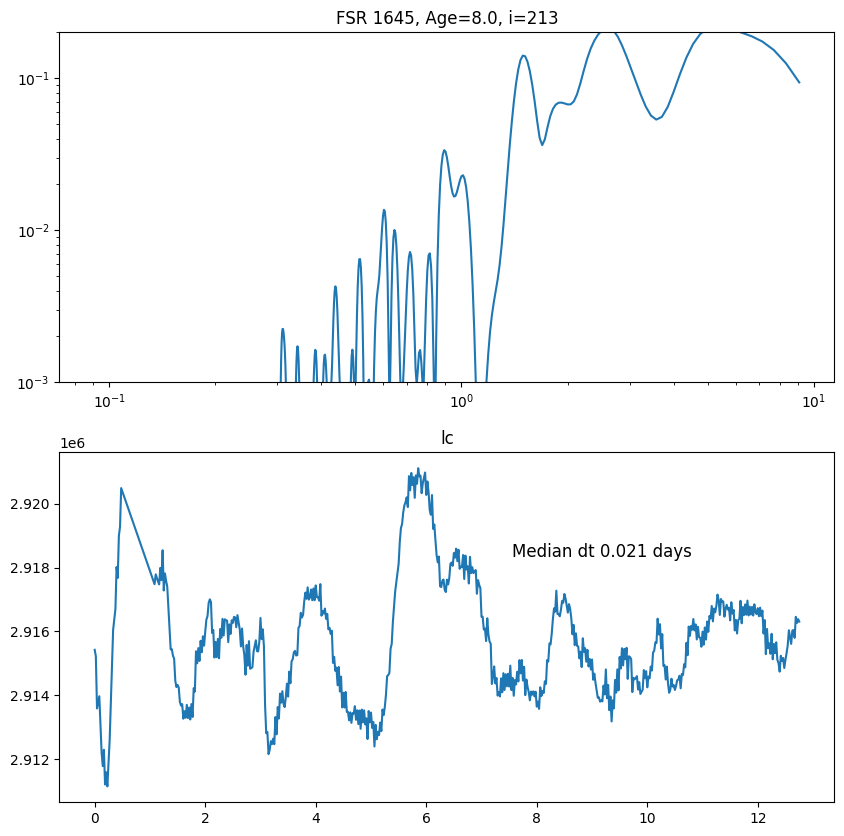

<Figure size 1200x500 with 0 Axes>

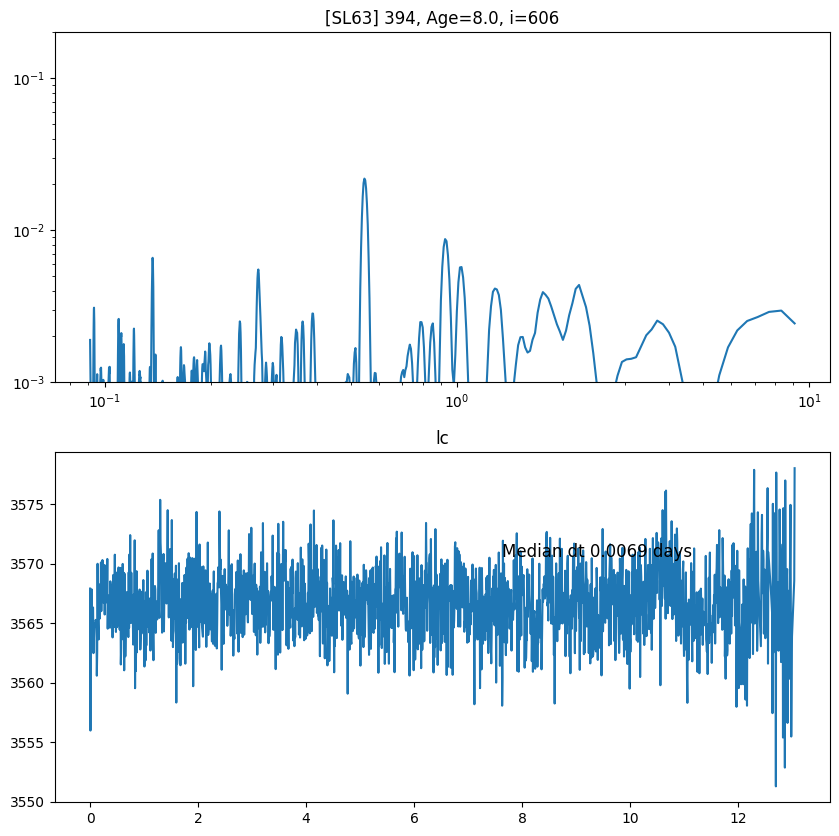

<Figure size 1200x500 with 0 Axes>

In [96]:
#from scipy.signal import find_peaks #finds peaks in a perodigram

def compute_average_peak_strengths(periodogram_column):
    """
    Computes the average peak strength for each periodogram.

    Parameters:
    -----------
    periodogram_column : astropy.table.Column or np.ndarray
        2D array-like object of shape (n_samples, n_freqs)

    Returns:
    --------
    np.ndarray
        Array of average peak strengths for each sample.
    """
    periodograms = np.asarray(periodogram_column)  # shape: (N, F)
    n_samples = periodograms.shape[0]
    peaks = np.zeros(n_samples)

    for i in range(n_samples):
        pgram = periodograms[i]
        peaks[i] = np.max(pgram)
        
    return np.mean(peaks)

mean_peak_strength = compute_average_peak_strengths(stat_table['FullPeriodogram'])
print('mean_peak_strength', mean_peak_strength)
for _ in range(2):
    fig, axs = plt.subplots(2, figsize=(10,10))
    i = random.randint(0, len(data_augmented_lcs) - 1)
    print(len(data_augmented_lcs[i]['time']))
    plt.figure(figsize=(12,5))
    #plt.scatter(l_of__all_lcs[i]['time'].value, l_of__all_lcs[i]['flux'].value, s=1)
    x = frequency_list
    y = stat_table[i]['FullPeriodogram']
    axs[0].set_title(str(stat_table[i]['name'])+', Age='+str(stat_table[i]['Lit_Clst_Age'])+', i='+str(i))
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_ylim(1e-3, 0.2)
    axs[0].plot(x, y)

    t = data_augmented_lcs[i]['time'].value
    f = data_augmented_lcs[i]['flux'].value
    med_dt = np.median(np.diff(t))
    axs[1].set_title('lc')
    axs[1].plot(t-t[0], f)
    axs[1].annotate(f'Median dt {med_dt:.2g} days', xy=(0.7, 0.7), xycoords='axes fraction', ha='center', fontsize=12, color='black')

   # plt.vline(10)
    # Longer periods means older to zeroth order, for rotational variablility
    
    

mean_peak_strength 0.19194784291678366
590
476
590
476
598


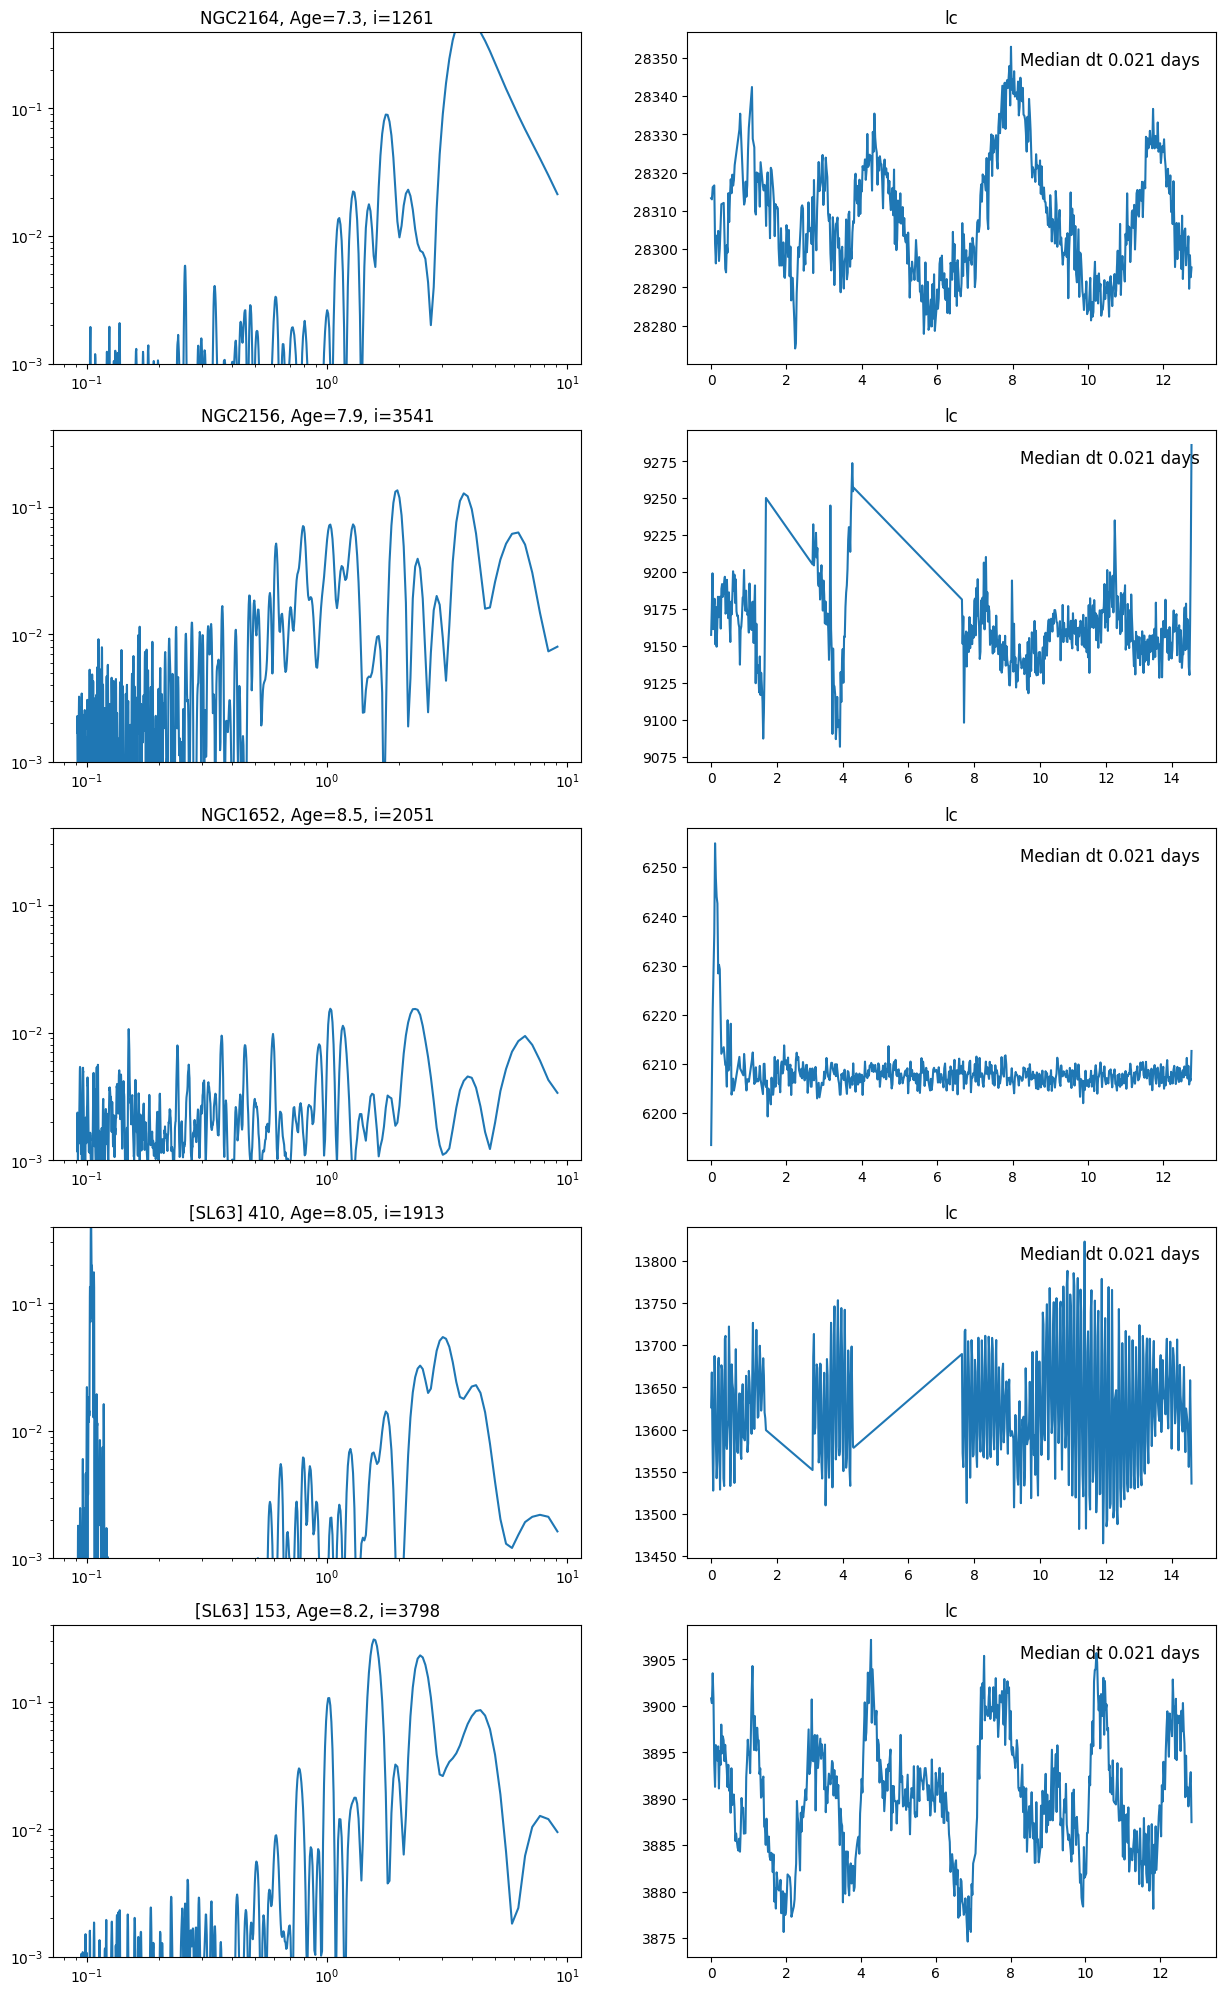

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [109]:

mean_peak_strength = compute_average_peak_strengths(stat_table['FullPeriodogram'])
print('mean_peak_strength', mean_peak_strength)

num_lcs = 5
fig, axs = plt.subplots(num_lcs, 2, figsize=(15, 5*num_lcs))

for j in range(num_lcs):
    i = random.randint(0, len(data_augmented_lcs) - 1)
    print(len(data_augmented_lcs[i]['time']))
    plt.figure(figsize=(12,5))
    #plt.scatter(l_of__all_lcs[i]['time'].value, l_of__all_lcs[i]['flux'].value, s=1)
    x = frequency_list
    y = stat_table[i]['FullPeriodogram']
    axs[j, 0].set_title(str(stat_table[i]['name'])+', Age='+str(stat_table[i]['Lit_Clst_Age'])+', i='+str(i))
    axs[j, 0].set_xscale('log')
    axs[j, 0].set_yscale('log')
    axs[j, 0].set_ylim(1e-3, 0.4)
    axs[j, 0].plot(x, y)

    t = data_augmented_lcs[i]['time'].value
    f = data_augmented_lcs[i]['flux'].value
    med_dt = np.median(np.diff(t))
    axs[j, 1].set_title('lc')
    axs[j, 1].plot(t-t[0], f)
    axs[j, 1].annotate(f'Median dt {med_dt:.2g} days', xy=(0.8, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='black')


In [117]:
import random
import numpy as np
import matplotlib.pyplot as plt

def grand_plot(
    lightcurve_list,
    stats_table,
    frequency_list,
    mode='random_pairs',
    num_lcs=5,
    cluster_name=None,
    random_seed=None
):
    """
    Grand plotting function for lightcurve and periodogram data.

    Parameters
    ----------
    lightcurve_list : list of dict
        Each dict must have keys: 'time', 'flux'.
    stats_table : list of dict
        Each dict must have keys: 'name', 'Lit_Clst_Age', 'FullPeriodogram'.
    frequency_list : array-like
        Frequencies for the periodogram plots.
    mode : str
        'random_pairs'            -> Random LC/periodogram pairs (default)
        'cluster'                  -> All LCs for a given cluster_name
        'random_sorted_by_age'     -> Random LCs sorted by age
    num_lcs : int
        Number of LCs to plot (ignored if mode='cluster' and plotting all from cluster).
    cluster_name : str
        Cluster to plot if mode='cluster'.
    random_seed : int or None
        Optional seed for reproducibility.
    """

    if random_seed is not None:
        random.seed(random_seed)
        np.random.seed(random_seed)

    n_lcs = len(lightcurve_list)

    # --- Select indices based on mode ---
    if mode == 'random_pairs':
        indices = random.sample(range(n_lcs), num_lcs)

    elif mode == 'cluster':
        if cluster_name is None:
            raise ValueError("Must provide cluster_name when mode='cluster'.")
        indices = [i for i, s in enumerate(stats_table) if s['name'] == cluster_name]
        if len(indices) == 0:
            raise ValueError(f"No lightcurves found for cluster '{cluster_name}'.")
        if num_lcs is not None and num_lcs < len(indices):
            indices = indices[:num_lcs]

    elif mode == 'random_sorted_by_age':
        all_indices = random.sample(range(n_lcs), num_lcs)
        indices = sorted(all_indices, key=lambda i: stats_table[i]['Lit_Clst_Age'])

    else:
        raise ValueError("Invalid mode. Choose 'random_pairs', 'cluster', or 'random_sorted_by_age'.")

    # --- Plot ---
    fig, axs = plt.subplots(len(indices), 2, figsize=(15, 5*len(indices)))
    if len(indices) == 1:
        axs = np.array([axs])  # force 2D shape

    for j, i in enumerate(indices):
        # Periodogram
        x = frequency_list
        y = stats_table[i]['FullPeriodogram']
        axs[j, 0].set_title(f"{stats_table[i]['name']}, Age={stats_table[i]['Lit_Clst_Age']}, i={i}")
        axs[j, 0].set_xscale('log')
        axs[j, 0].set_yscale('log')
        axs[j, 0].set_ylim(1e-3, 0.4)
        axs[j, 0].plot(x, y)

        # Lightcurve
        t = lightcurve_list[i]['time'].value
        f = lightcurve_list[i]['flux'].value
        med_dt = np.median(np.diff(t))
        axs[j, 1].set_title('Lightcurve')
        axs[j, 1].plot(t - t[0], f)
        axs[j, 1].annotate(f'Median dt {med_dt:.2g} days',
                           xy=(0.8, 0.9), xycoords='axes fraction',
                           ha='center', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()


In [126]:
print(np.unique(stat_table['name']))

   name   
----------
  ASCC 116
   ASCC 57
    ASCC 8
   ASCC 81
    ASCC 9
  BASEL 12
  BASEL 13
       ...
[SL63] 695
[SL63] 730
[SL63] 741
 [SL63] 75
 [SL63] 76
[SL63] 763
[SL63] 822
Length = 348 rows


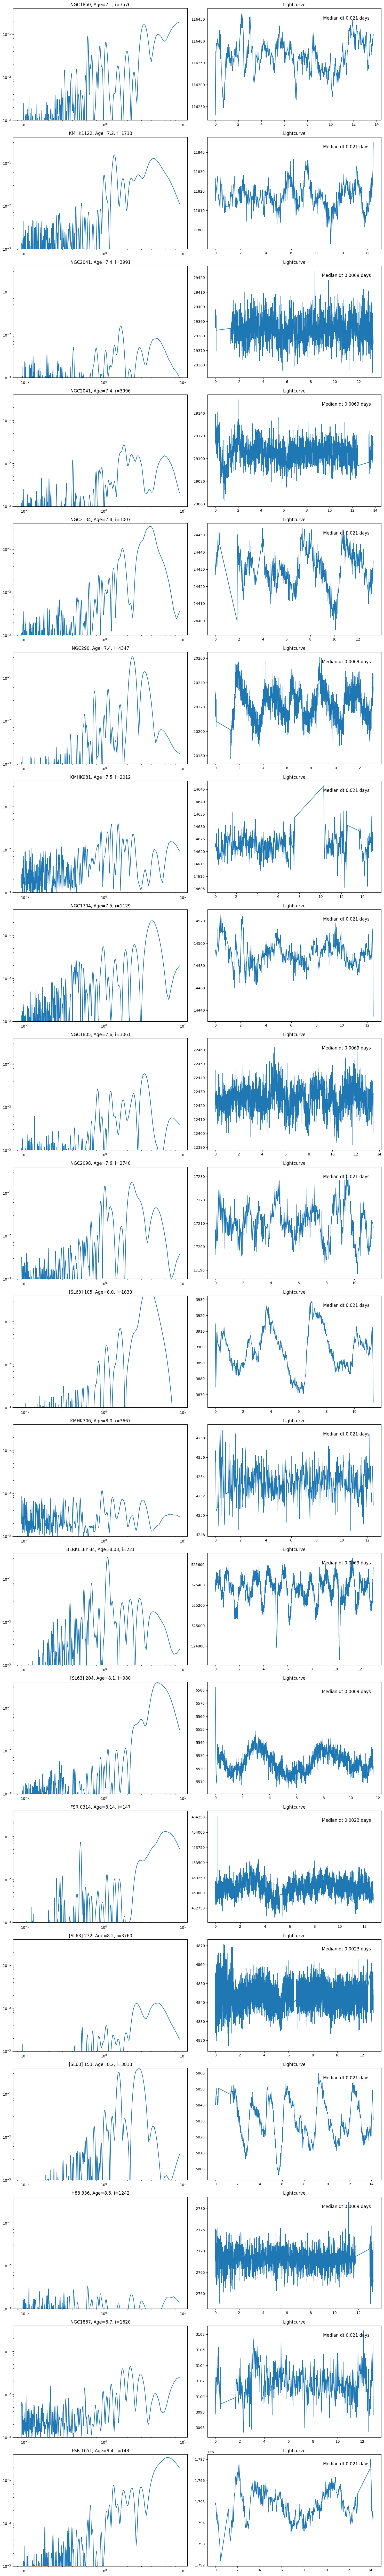

In [135]:
grand_plot(
    lightcurve_list=data_augmented_lcs,
    stats_table=stat_table,
    frequency_list=frequency_list,
    #mode='random_pairs',
    #mode='cluster',
    mode='random_sorted_by_age',
    #cluster_name='[SL63] 695',
    num_lcs=20
)
